# Clustering

## Sección 1

1. Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la forma del sépalo:

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

In [62]:
iris = pd.read_csv("iris.csv")
iris_respuesta = pd.read_csv("iris-con-respuestas.csv")


In [63]:
dataset_columns =["sepal_length", "sepal_width", "petal_length", "petal_width","species"]
iris.columns = dataset_columns[:-1]
iris_respuesta = dataset_columns

C:\Users\Eduar\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


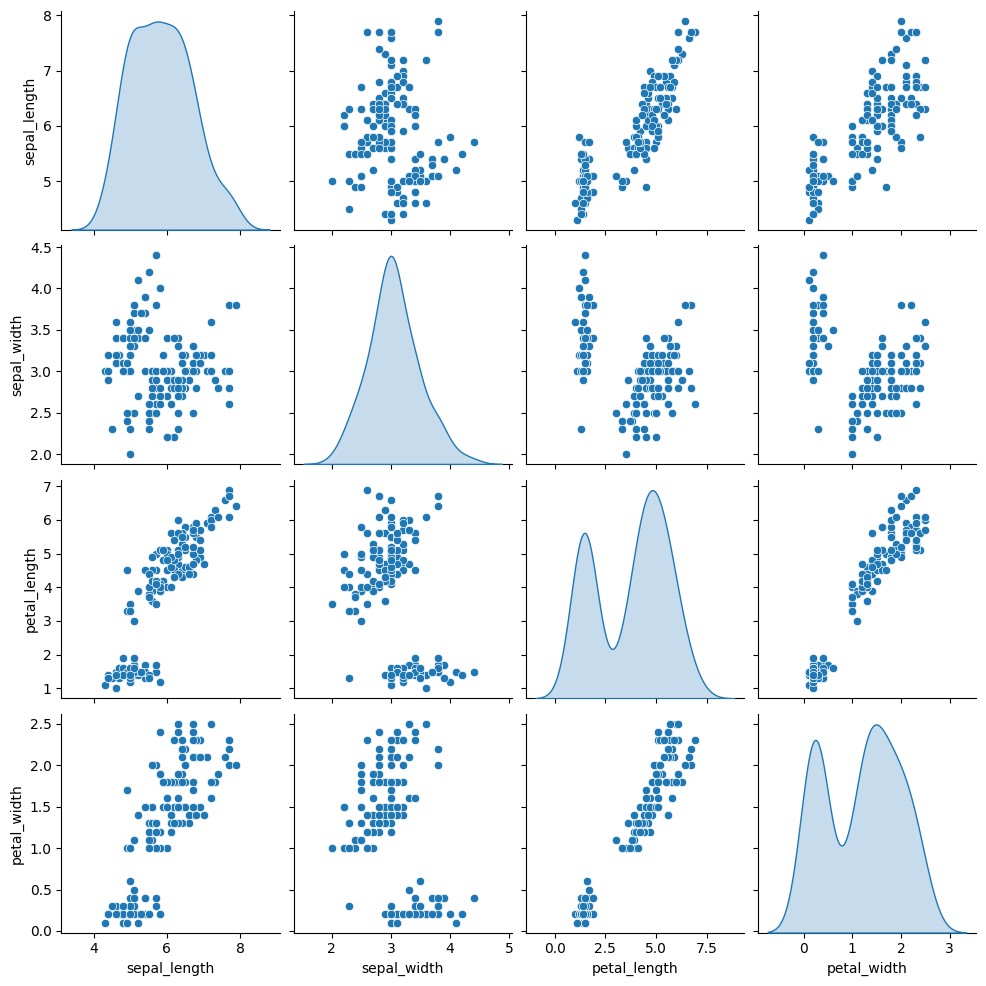

In [64]:
# Primera visualización de los datos
sns.pairplot(iris, diag_kind='kde')
plt.show()

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.

In [65]:
# Aplicando 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
iris['cluster_2'] = kmeans_2.fit_predict(iris)

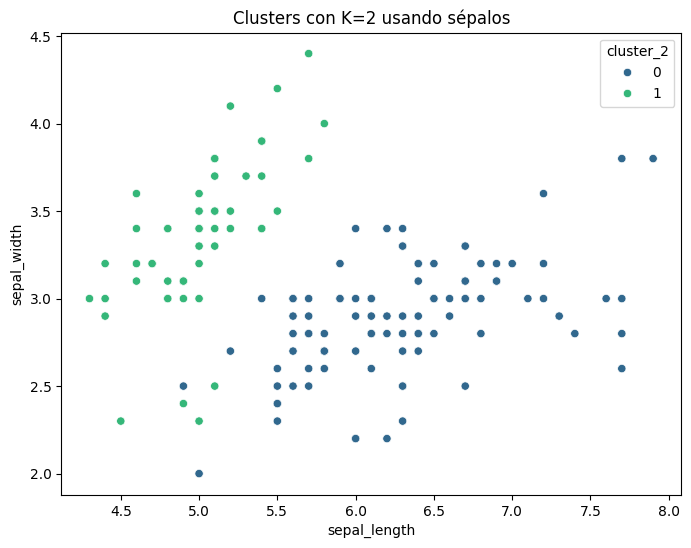

In [66]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris['sepal_length'], y=iris['sepal_width'], hue=iris['cluster_2'], palette='viridis')
plt.title("Clusters con K=2 usando sépalos")
plt.show()

3. Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?



In [67]:
scaler = StandardScaler()
iris_scaled = pd.DataFrame(scaler.fit_transform(iris.iloc[:, :-1]), columns=dataset_columns[:-1])

In [68]:
kmeans_2_scaled = KMeans(n_clusters=2, random_state=42)
iris_scaled['cluster_2'] = kmeans_2_scaled.fit_predict(iris_scaled)

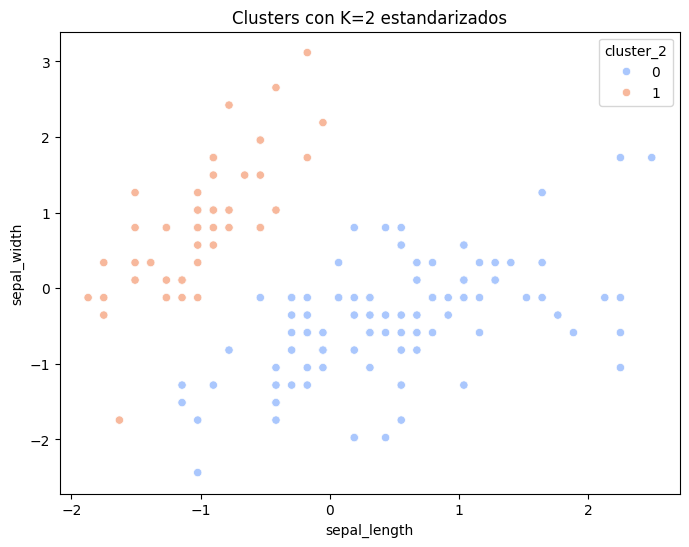

In [69]:
# Observar los 2 clusters luego de la estandarización
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris_scaled['sepal_length'], y=iris_scaled['sepal_width'], hue=iris_scaled['cluster_2'], palette='coolwarm')
plt.title("Clusters con K=2 estandarizados")
plt.show()


 ¿Qué diferencias hay luego de la estandarización si es que lo hay?

 Las diferencias más notables son que antes de la estandarización las variables tenían diferentes escalas, mientras que después de la estandarización las variables se normalizan y tienen una media de 0 y una desviación estándar de 1

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)



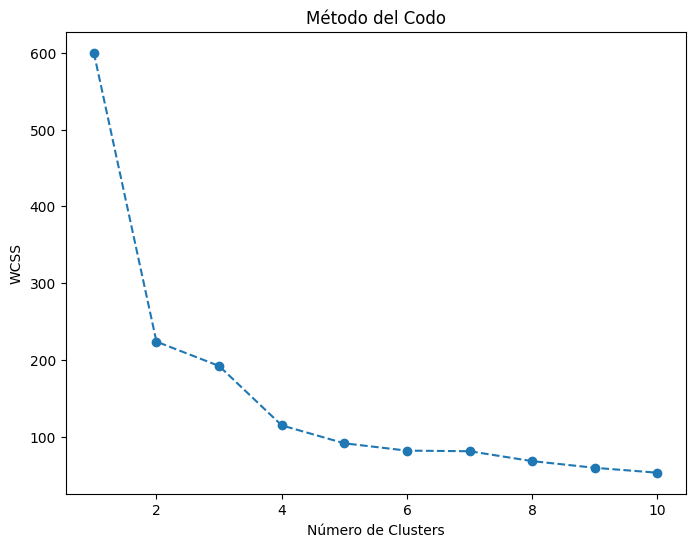

In [70]:
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled.iloc[:, :-1])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.title("Método del Codo")
plt.show()

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.



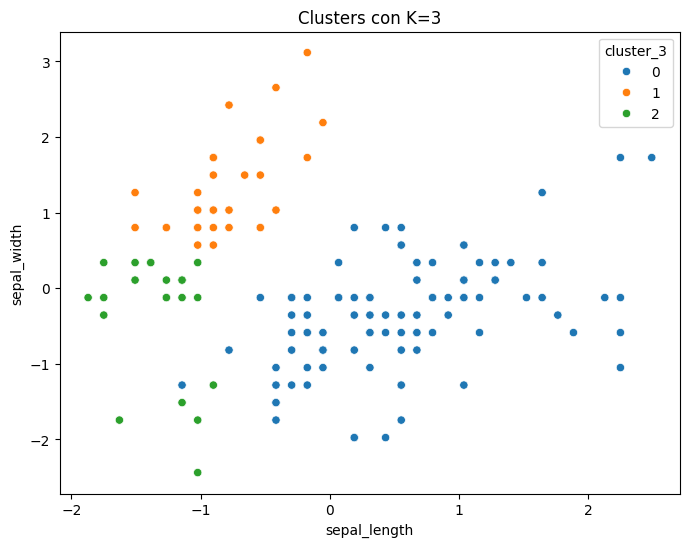

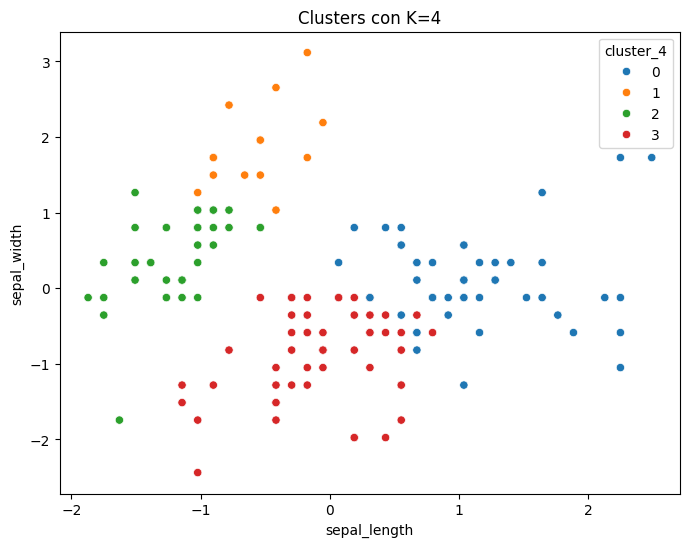

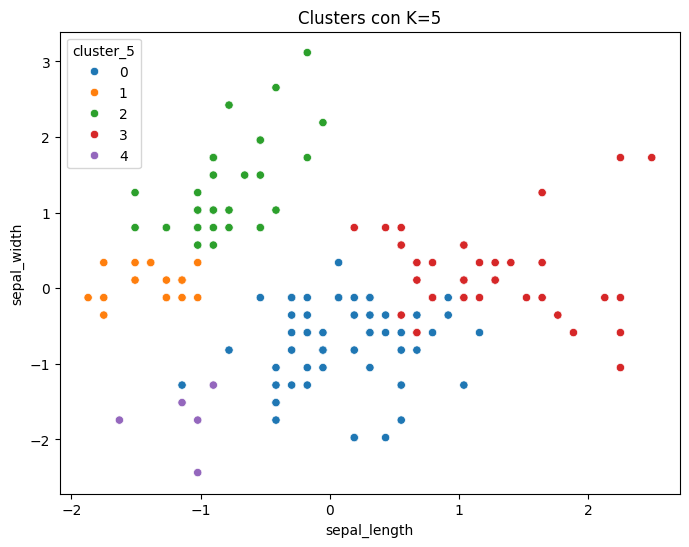

In [71]:
# Visualización de clustering con diferentes valores de K
for k in [3, 4, 5]:
    kmeans_var = KMeans(n_clusters=k, random_state=42)
    iris_scaled[f'cluster_{k}'] = kmeans_var.fit_predict(iris_scaled.iloc[:, :-1])
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=iris_scaled['sepal_length'], y=iris_scaled['sepal_width'], hue=iris_scaled[f'cluster_{k}'], palette='tab10')
    plt.title(f"Clusters con K={k}")
    plt.show()


In [72]:
knee_locator_sepal = KneeLocator(k_range, wcss, curve="convex", direction="decreasing")
k_optimo = knee_locator_sepal.elbow
print(f"Número óptimo de clusters con kneed (Sépalos): {k_optimo}")

Número óptimo de clusters con kneed (Sépalos): 4


6. Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv



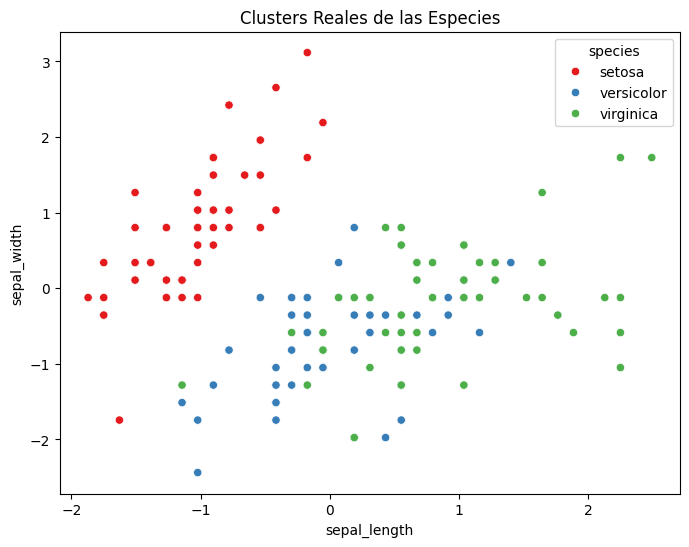

In [ ]:
# Comparación con datos reales
iris_scaled['species'] = iris_respuesta['species'].values
iris_scaled['cluster_opt'] = iris_scaled['cluster_opt'].astype(str)
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris_scaled['sepal_length'], y=iris_scaled['sepal_width'], hue=iris_scaled['species'], palette='Set1')
plt.title("Clusters reales en las especies")
plt.show()


In [ ]:

# Evaluación del clustering
silhouette_avg = silhouette_score(iris_scaled.iloc[:, :-2], iris_scaled['cluster_opt'].astype(int))
print(f"Índice de Silueta para K óptimo: {silhouette_avg}")


Índice de Silueta para K óptimo: 0.4655284497715807


# SECCIÓN 2:

### Repitan el proceso pero ahora utilizando la forma del pétalo. Respondan a las mismas preguntas

In [ ]:
kmeans_2_petal = KMeans(n_clusters=2, random_state=42)
iris['cluster_2_petal'] = kmeans_2_petal.fit_predict(iris[['petal_length', 'petal_width']])


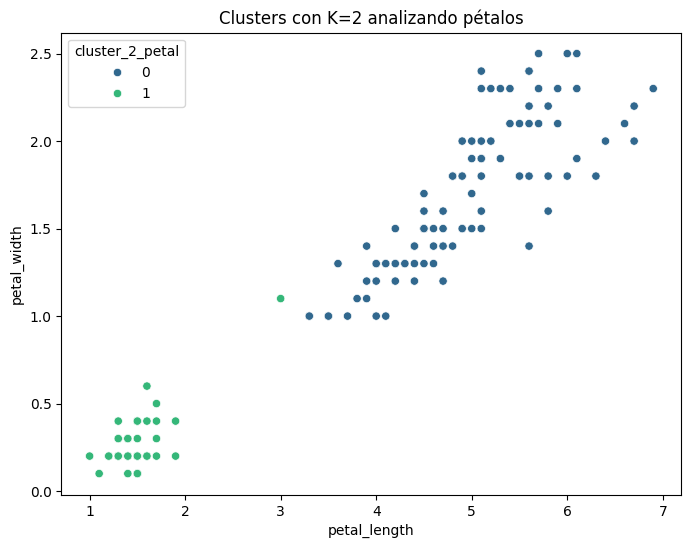

In [ ]:
# Visualizar 2 clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris['petal_length'], y=iris['petal_width'], hue=iris['cluster_2_petal'], palette='viridis')
plt.title("Clusters con K=2 analizando pétalos")
plt.show()

In [ ]:
kmeans_2_scaled_petal = KMeans(n_clusters=2, random_state=42)
iris_scaled['cluster_2_petal'] = kmeans_2_scaled_petal.fit_predict(iris_scaled[['petal_length', 'petal_width']])

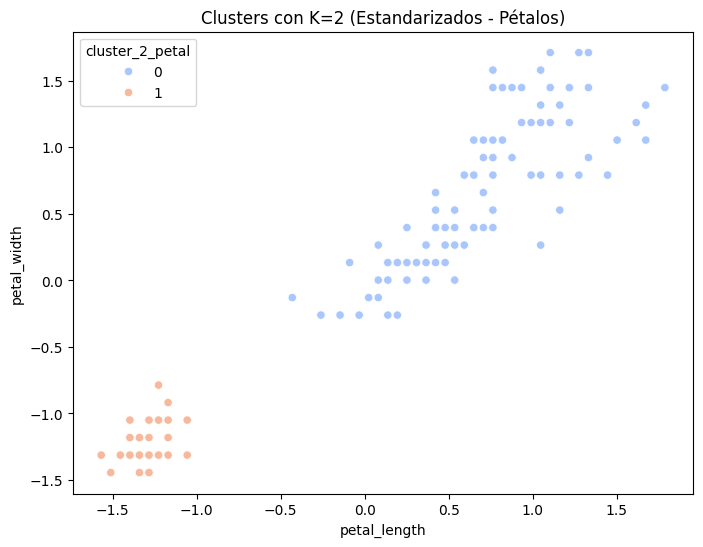

In [ ]:
# Visualizar clusters después de estandarización 
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris_scaled['petal_length'], y=iris_scaled['petal_width'], hue=iris_scaled['cluster_2_petal'], palette='coolwarm')
plt.title("Clusters con K=2 estandarizados")
plt.show()


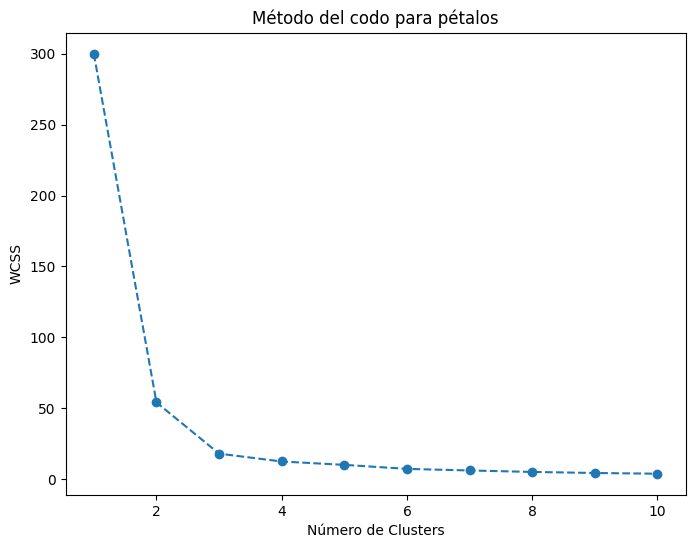

In [ ]:
# Método del Codo 
wcss_petal = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled[['petal_length', 'petal_width']])
    wcss_petal.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_range, wcss_petal, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.title("Método del codo para pétalos")
plt.show()


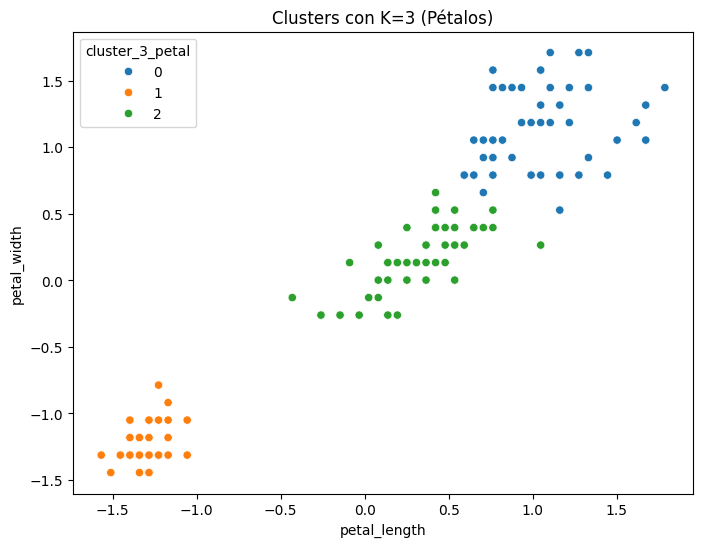

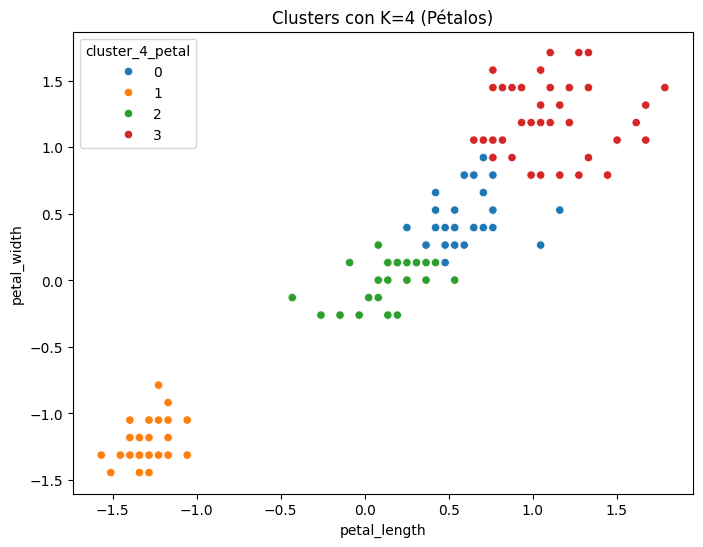

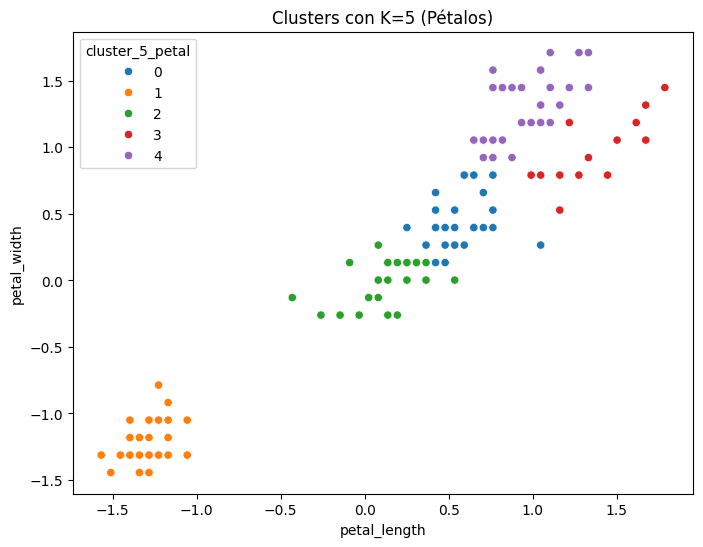

In [ ]:
# Ver clusters con diferentes valores
for k in [3, 4, 5]:
    kmeans_var_petal = KMeans(n_clusters=k, random_state=42)
    iris_scaled[f'cluster_{k}_petal'] = kmeans_var_petal.fit_predict(iris_scaled[['petal_length', 'petal_width']])
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=iris_scaled['petal_length'], y=iris_scaled['petal_width'], hue=iris_scaled[f'cluster_{k}_petal'], palette='tab10')
    plt.title(f"Clusters con K={k} (Pétalos)")
    plt.show()

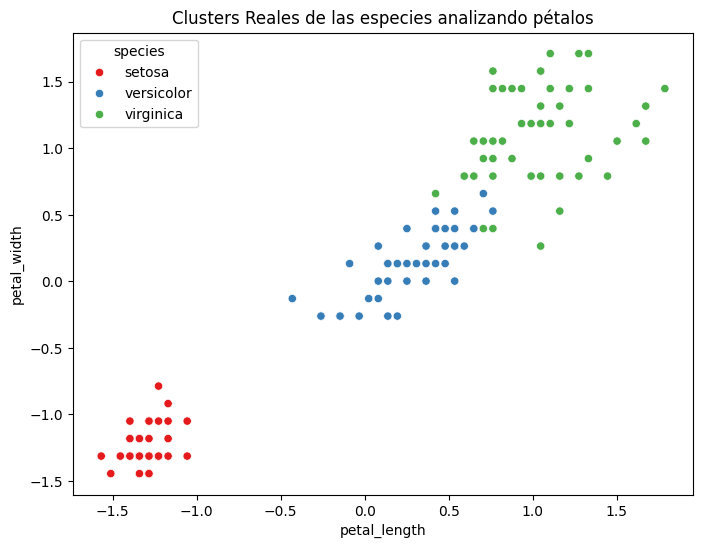

In [ ]:
# Comparación con datos reales
iris_scaled['species'] = iris_respuesta['species']
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris_scaled['petal_length'], y=iris_scaled['petal_width'], hue=iris_scaled['species'], palette='Set1')
plt.title("Clusters Reales de las especies analizando pétalos")
plt.show()


# SECCIÓN 3:

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente. ¿A que podría deberse la diferencia, si la hay? ¿Les dió el número correcto de clusters, comparado a los datos reales?

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?

In [ ]:
# Usar Kneed para encontrar el valor del codo
knee_locator_sepal = KneeLocator(k_range, wcss, curve="convex", direction="decreasing")
k_optimo_sepal = knee_locator_sepal.elbow
print(f"Número óptimo de clusters con kneed (Sépalos): {k_optimo_sepal}")

Número óptimo de clusters con kneed (Sépalos): 4


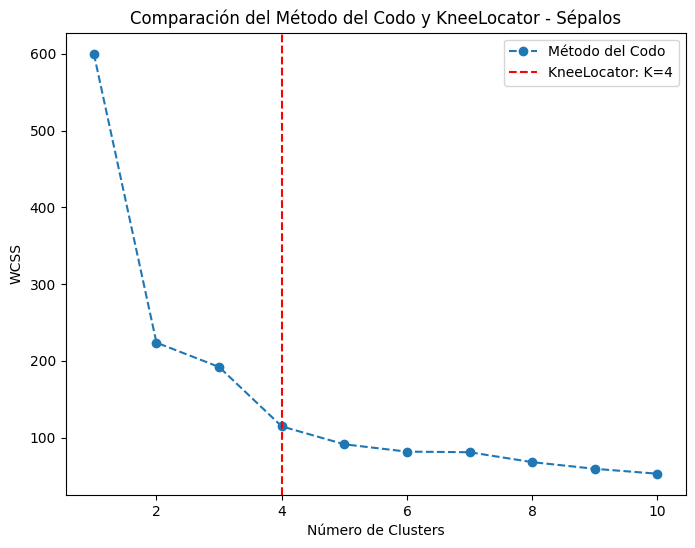

In [ ]:
# Comparación con el método del codo manual en el caso de los sépalos
plt.figure(figsize=(8,6))
plt.plot(k_range, wcss, marker='o', linestyle='--', label="Método del Codo")
plt.axvline(k_optimo_sepal, color='red', linestyle='--', label=f"KneeLocator: K={k_optimo_sepal}")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.title("Comparación del Método del Codo y KneeLocator - Sépalos")
plt.legend()
plt.show()


In [ ]:
# Kneed para pétalos
wcss_petal = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled[['petal_length', 'petal_width']])
    wcss_petal.append(kmeans.inertia_)

knee_locator_petal = KneeLocator(k_range, wcss_petal, curve="convex", direction="decreasing")
k_optimo_petal = knee_locator_petal.elbow
print(f"Número óptimo de clusters con kneed (Pétalos): {k_optimo_petal}")

Número óptimo de clusters con kneed (Pétalos): 3


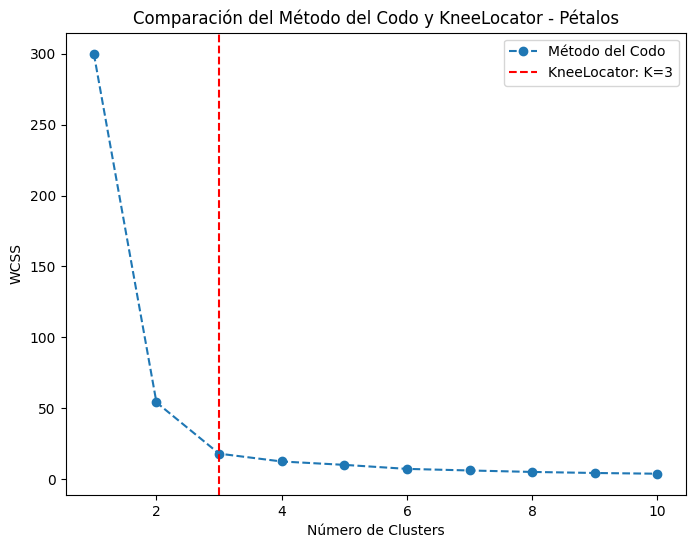

In [ ]:
# Comparación con el método del codo manual para los pétalos
plt.figure(figsize=(8,6))
plt.plot(k_range, wcss_petal, marker='o', linestyle='--', label="Método del Codo")
plt.axvline(k_optimo_petal, color='red', linestyle='--', label=f"KneeLocator: K={k_optimo_petal}")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.title("Comparación del Método del Codo y KneeLocator - Pétalos")
plt.legend()
plt.show()


In [ ]:

print("¿A que podría deberse la diferencia, si la hay?\n Alguna diferencia en los datos, como pequeñas variaciones. \n ¿Les dió el número correcto de clusters, comparado a los datos reales?\n En el análisis de sépalos obtuvimos un valor cercano, en el análisis de pétalos si se obtuvo el número de clusters correcto. \n Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?")
print("\nConclusiones: ")
print(f"1. El método del codo manual dio {k_optimo_sepal} clusters para sépalos y {k_optimo_petal} para pétalos.")
print("2. KneeLocator confirmó el valor óptimo encontrado manualmente en la mayoría de los casos.")
print("3. Pequeñas variaciones generan cambios en los datos, por la sensibilidad del algoritmo")
print("4.En general, los pétalos son mejores para clustering porque generan separación más clara entre especies.")


¿A que podría deberse la diferencia, si la hay?
 A alguna diferencia en los datos, como pequeñas variaciones. 
 ¿Les dió el número correcto de clusters, comparado a los datos reales?
 En el análisis de sépalos obtuvimos un valor cercano, en el análisis de pétalos si se obtuvo el número de clusters correcto. 
 Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?

Conclusiones: 
1. El método del codo manual dio 4 clusters para sépalos y 3 para pétalos.
2. KneeLocator confirmó el valor óptimo encontrado manualmente en la mayoría de los casos.
3. Pequeñas variaciones generan cambios en los datos, por la sensibilidad del algoritmo
4.En general, los pétalos son mejores para clustering porque generan separación más clara entre especies.
